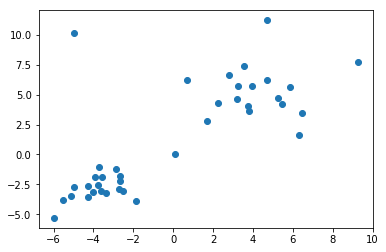

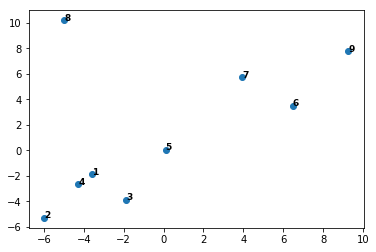

In [166]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

X = np.array([[1, -3.57, -1.88],
              [2, -5.98, -5.30],
              [3, -1.89, -3.89],
              [4, -4.27, -2.68],
              [5, 0.10, 0.06],
              [6, 6.48, 3.48],
              [7, 3.94, 5.72],
              [8, -4.99, 10.20],
              [9, 9.27, 7.77],
              [10, -2.67, -1.80],
              [11, -5.55, -3.78],
              [12, -3.38, -3.23],
              [13, -4.00, -3.13],
              [14, -4.97, -2.71],
              [15, -3.77, -2.55],
              [16, -5.14, -3.47],
              [17, -2.52, -3.07],
              [18, -3.73, -1.08],
              [19, -2.88, -1.18],
              [20, -3.90, -1.90],
              [21, -4.27, -3.55],
              [22, -2.69, -2.20],
              [23, -3.60, -3.05],
              [24, -2.74, -2.92],
              [25, 5.45, 4.25],
              [26, 2.23, 4.31],
              [27, 3.25, 5.71],
              [28, 5.24, 4.74],
              [29, 2.81, 6.66],
              [30, 5.85, 5.68],
              [31, 3.75, 4.07],
              [32, 3.82, 3.66],
              [33, 6.30, 1.66],
              [34, 3.20, 4.62],
              [35, 4.70, 6.22],
              [36, 3.53, 7.43],
              [37, 4.69, 11.23],
              [38, 0.68, 6.25],
              [39, 1.70, 2.80]])

plt.scatter(X[:, 1], X[:, 2])
plt.show()
plt.scatter(X[:9, 1], X[:9, 2])
for i in range(9):
    plt.text(X[i, 1], X[i, 2], str(int(X[i, 0])),
             fontdict={'weight': 'bold', 'size': 9})
plt.show()


# Problem a

- $X_6, X_7, X_9$ are the outlier.
- Assumption: outliers are not similar to the rest of the data
- Strength: simple
- Weakness: only work on small data set

[3. 1. 1. 1. 1. 0. 1. 1.]


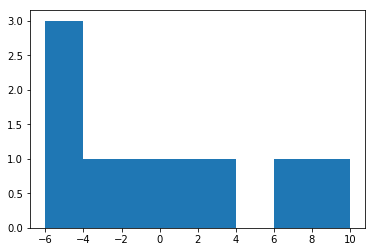

In [167]:
import math

out = plt.hist(X[:9, 1], bins=range(-6, math.ceil(np.max(X[:9, 1]))+2, 2))
print(out[0])
plt.show()


# Problem b

- $X_9$ is the outlier.
- Assumption: probability distribution underlying the data generation process
- Strength: simple
- Weakness: might not be correct if the distribution is not symetric

In [168]:
mean = np.mean(X[:9, 1])
std = np.std(X[:9, 1])
zScores = (X[:9, 1] - mean) / std
print(zScores)


[-0.67375021 -1.14183612 -0.34744966 -0.80970877  0.03906111  1.2782263
  0.78489094 -0.94955187  1.82011829]


# Problem c

- $X_8$ is the oulier
- Assumption: outliers are not similar to the rest of the data
- Strength: simple
- Weakness: difficult to choose cells width, local, harder to work with higher dimension

[9.   9.27 7.77]
[[2. 1. 0. 0. 1.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0.]]


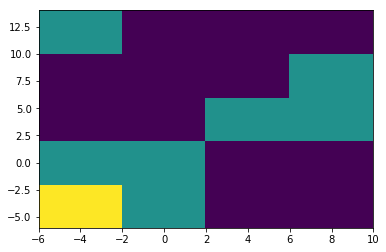

In [169]:
out = plt.hist2d(X[:9, 1], X[:9, 2], bins=[np.arange(-6, np.max(X[:9, 1])+4, 4),
                                     np.arange(-6, np.max(X[:9, 2])+4, 4)])
print(X[8,:])
print(out[0])
plt.show()


# Problem d

- Assumption: outliers lie at the border of the data space, whereas inliers lie in the center of the data space
- Strength: seem legit
- Weakness: problem with high dimensonality

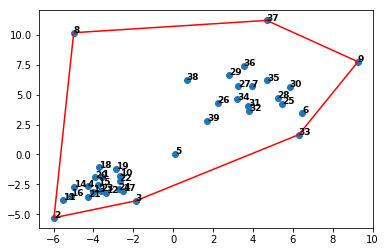

In [170]:
plt.scatter(X[:, 1], X[:, 2])
for i in range(X.shape[0]):
    plt.text(X[i, 1], X[i, 2], str(int(X[i, 0])),
             fontdict={'weight': 'bold', 'size': 9})

outliers = []
for i in [1, 7, 36, 8, 32, 2, 1]:
    outliers.append(X[i, :])

outliers = np.array(outliers)
plt.plot(outliers[:, 1], outliers[:, 2], c='r')
plt.show()


# Problem e

- Most of them are outliers?
- Assumption: outliers are not similar to the rest of the data
- Strength:
- Weakness:

[[ 0.          4.18383795  2.61963738  1.06301458  4.15120464 11.39
  10.68457299 12.16317393 16.06200797]
 [ 4.18383795  0.          4.32622237  3.12865786  8.1053069  15.24270317
  14.8272317  15.53158395 20.08450647]
 [ 2.61963738  4.32622237  0.          2.66992509  4.42296281 11.15230021
  11.24015124 14.42699206 16.14004957]
 [ 1.06301458  3.12865786  2.66992509  0.          5.15795502 12.38983858
  11.74581202 12.90010853 17.10362827]
 [ 4.15120464  8.1053069   4.42296281  5.15795502  0.          7.23883969
   6.83967836 11.34582302 11.98052586]
 [11.39       15.24270317 11.15230021 12.38983858  7.23883969  0.
   3.38662073 13.29358116  5.11744077]
 [10.68457299 14.8272317  11.24015124 11.74581202  6.83967836  3.38662073
   0.          9.99076073  5.71063919]
 [12.16317393 15.53158395 14.42699206 12.90010853 11.34582302 13.29358116
   9.99076073  0.         14.46556255]
 [16.06200797 20.08450647 16.14004957 17.10362827 11.98052586  5.11744077
   5.71063919 14.46556255  0.       

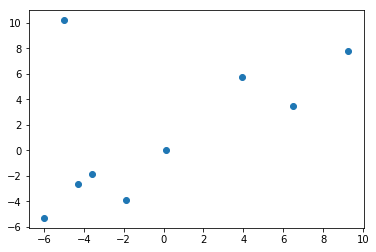

In [171]:
from scipy.spatial import distance_matrix

D = distance_matrix(X[:9, 1:3], X[:9, 1:3])
print(D)
D[D > 2] = 0
print(D)
plt.scatter(X[:9, 1], X[:9, 2])
plt.show()


# Problem f

- $X_8, X_9$ are the ouliers
- Assumption: outliers are not similar to the rest of the data
- Strength: finner granualiry
- Weakness: computational heavy


In [172]:
D = distance_matrix(X[:9, 1:3], X[:9, 1:3])
D = np.sort(D, axis=1)
print(D[:, 5])
# plt.scatter(X[:9, 1], X[:9, 2])
# plt.show()

[10.68457299 14.8272317  11.15230021 11.74581202  7.23883969 11.39
 10.68457299 13.29358116 16.06200797]


# Problem g

- $X_8, X_9$ are the ouliers of cluster A, $X_8, X_2$ are the ouliers of cluster B
- Assumption: outliers are not similar to the rest of the data
- Strength: unitless and scale-invariant, takes into account the correlations of the data set. [Wiki]
- Weakness: choosing the cluster is difficult.

[[ 1.35  2.71  3.47  0.7   4.34 10.63 10.4  19.39 14.5 ]
 [ 6.44  8.99  6.63  7.1   3.92  2.01  0.46  7.16  3.84]]
[0 0 0 0 1 1 1 1 1]


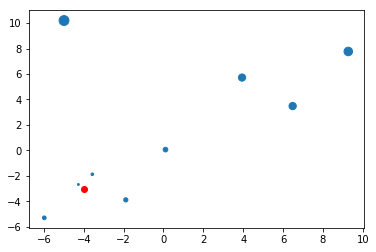

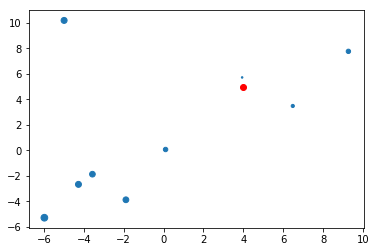

In [173]:
mu_a = np.array([-4, -3])
mu_b = np.array([4, 5])
sigma_a = np.array([[1, 0.5], [0.5, 0.75]])
sigma_b = np.array([[2.2, 0.2], [0.2, 2.5]])

D_a = np.sqrt(np.diagonal((X[:9, 1:3] - mu_a) @ np.linalg.inv(sigma_a) @ (X[:9, 1:3] - mu_a).T))
# print(np.diagonal(D_a))
D_b = np.sqrt(np.diagonal((X[:9, 1:3] - mu_b) @ np.linalg.inv(sigma_b) @ (X[:9, 1:3] - mu_b).T))
# print(np.diagonal(D_b))
D = np.array([np.round(D_a, 2), np.round(D_b, 2)])
print(D)
print(np.argmin(D, axis=0))

plt.scatter(X[:9, 1], X[:9, 2], s=D_a * 5)
plt.scatter([-4], [-3], c='r')
plt.show()

plt.scatter(X[:9, 1], X[:9, 2], s=D_b * 5)
plt.scatter([4], [5], c='r')
plt.show()



# Problem h

- None are outlier?
- Strength: good for local density estimation
- Weakness: difficult to compute

In [177]:
k = 5
D = np.round(distance_matrix(X[:, 1:3], X[:, 1:3]), 2)
delta_k = np.sort(D, axis=1)[:, k]
N_k = []
R_k = []
AR_kx = []
indices = []
for i in range(len(delta_k)):
    current_n_k = D[i, :]
    N_k.append(np.array(current_n_k[current_n_k <= delta_k[i]]))
    indices.append(np.where(current_n_k <= delta_k[i], np.ones(D[i, :].shape), np.zeros(D[i, :].shape)))
    R_k.append(np.array(np.where(current_n_k > D[i, :], current_n_k, D[i, :])))
    AR_kx.append(np.dot(R_k[i], indices[i]) / np.sum(indices[i]))

for i in range(len(delta_k)):
    Arkx = AR_kx[i]
    Arkx_prime = np.dot(indices[i], AR_kx)/np.sum(indices[i])
    lof = Arkx/(Arkx_prime * np.sum(indices[i]))
    print(i+1, lof)
# print(np.array(R_k))

# def lof(k, x):
#     for


1 0.1527317880794702
2 0.34456489891590975
3 0.3017174082747853
4 0.16335433834222005
5 0.3648421052631579
6 0.18776210446054137
7 0.15650142745912277
8 0.49677567941041
9 0.38815789473684215
10 0.17695473251028807
11 0.18429534134192796
12 0.16675165731769506
13 0.13951067152524727
14 0.21530249110320288
15 0.15554414784394252
16 0.175990675990676
17 0.16159250585480098
18 0.21122244488977956
19 0.18448475492087993
20 0.17580425917535117
21 0.19459198454852727
22 0.16245928338762214
23 0.14731910463300366
24 0.17495219885277247
25 0.15328633158972027
26 0.17414187643020596
27 0.15970580509587606
28 0.16088249876053548
29 0.18467153284671534
30 0.18274456521739127
31 0.1574001566170713
32 0.17401332649923115
33 0.28798095993653317
34 0.14142480211081795
35 0.16342776867244205
36 0.2204379562043796
37 0.3999681933842239
38 0.2723196086424786
39 0.21528662420382166
